In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
# Generate a sample time series dataset
np.random.seed(42)  # for reproducibility
data = pd.Series(2 * np.random.rand(100) + np.sin(np.linspace(0, 20, 100)))

# Split the dataset into training and testing datasets
train_data, test_data = data[0:int(len(data)*0.7)], data[int(len(data)*0.7):]


In [4]:
# Create and fit an ARIMA model with the training data

model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()


In [5]:

# Forecast future values using the model
forecast = model_fit.forecast(steps=len(test_data))

# Evaluate the model's performance using RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
mae = mean_absolute_error(test_data, forecast)

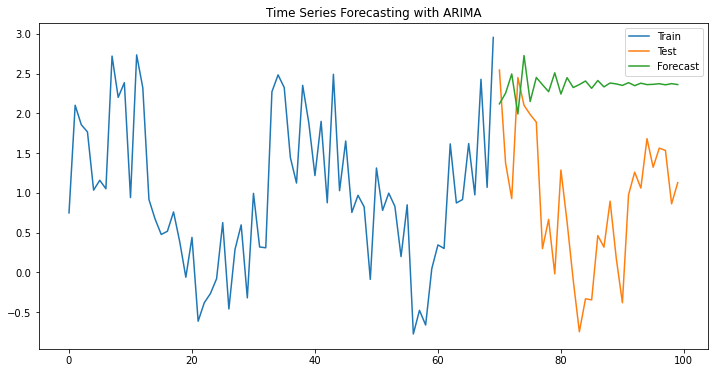

RMSE: 1.6905483016524332
MAE: 1.49481612680006


In [6]:

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Time Series Forecasting with ARIMA')
plt.legend()
plt.show()

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')